In [2]:
!pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.1 requires msgpack>=1.0, which is not installed.
librosa 0.10.1 requires numba>=0.51.0, which is not installed.
librosa 0.10.1 requires pooch>=1.0, which is not installed.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------- ----------------------- 0.6/1.5 MB 19.5 MB/s eta 0:00:01
     ------------------------------------ --- 1.3/1.5 MB 17.1 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 13.4 MB/s eta 0:00:00
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
     ---------------------------------------- 0.0/181.3 kB ? eta -:--:--
     ------------------------------------- 181.3/181.3 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
     -----------------------

5


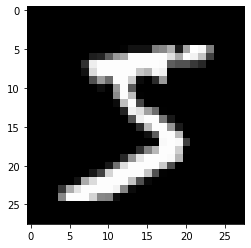

In [ ]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [ ]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
predictions (Dense)          (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([9, 5, 7, 5, 7, 5, 7, 9, 9, 9, 7, 9, 5, 5, 5, 7, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 5, 9, 5, 5, 9, 5, 5, 5, 9, 5, 9, 5, 5, 9, 5, 5, 7, 7, 7,
       5, 7, 9, 9, 5, 5, 7, 5, 9, 5, 7, 9, 7, 5, 9, 5, 9, 9, 5, 5, 9, 5,
       5, 5, 9, 5, 5, 9, 5, 5, 5, 9, 5, 5, 5, 9, 7, 5, 5, 5, 9, 9, 5, 5,
       5, 7, 5, 7, 5, 5, 9, 5, 7, 9, 5, 5])

In [ ]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [ ]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)

## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()
    

2.3715847

In [ ]:
# Stochastic gradient algorithm

# TO IMPLEMENT